# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



In [5]:
import math

print((math.log2(0.7)*0.7)+(math.log2(0.3)*0.3), "bits")

-0.8812908992306927 bits


#### The result comes out to be about 0.881 bits; less than one. This is because there is a bias in the outcome to be heads and is not evenly distributed between the two possble outcomes.

#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

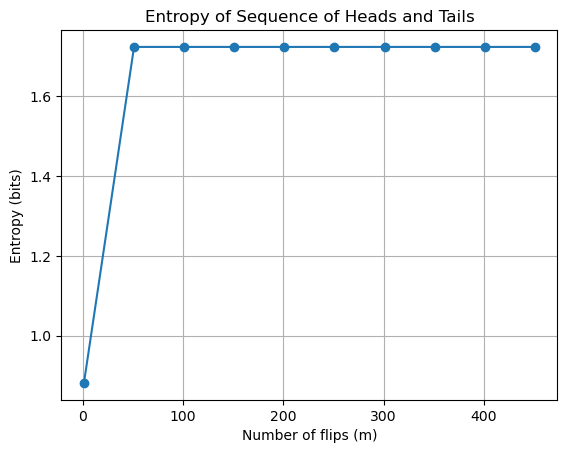

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate entropy
def entropy(p):
    return -np.sum(p * np.log2(p))

# Probability of heads and tails
p_heads = 0.7
p_tails = 0.3

# Range of values for m
m_values = np.arange(1, 501, 50)

# Calculate entropy for each value of m
entropies = []
for m in m_values:
    # Probability of getting a sequence of m flips with k heads
    p_sequence = np.array([(p_heads ** k) * (p_tails ** (m - k)) for k in range(m + 1)])
    # Normalize the probabilities
    p_sequence = p_sequence / np.sum(p_sequence)
    # Calculate entropy for this sequence
    entropies.append(entropy(p_sequence))

# Plotting
plt.plot(m_values, entropies, marker='o')
plt.title('Entropy of Sequence of Heads and Tails')
plt.xlabel('Number of flips (m)')
plt.ylabel('Entropy (bits)')
plt.grid(True)
plt.show()


#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



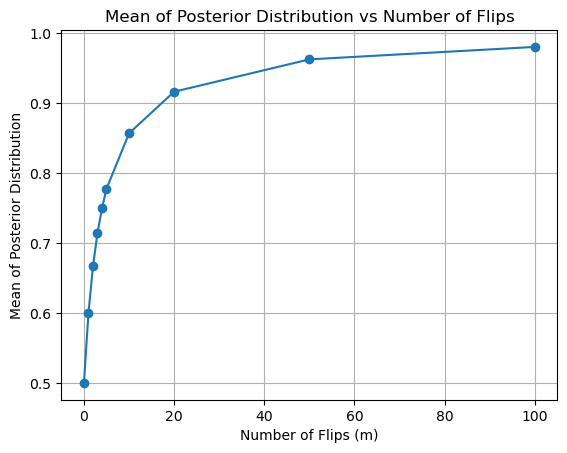

m 	 Mean 	 Variance
0 	 0.5000 	 0.0500
1 	 0.6000 	 0.0400
2 	 0.6667 	 0.0317
3 	 0.7143 	 0.0255
4 	 0.7500 	 0.0208
5 	 0.7778 	 0.0173
10 	 0.8571 	 0.0082
20 	 0.9167 	 0.0031
50 	 0.9630 	 0.0006
100 	 0.9808 	 0.0002


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define prior parameters
alpha = 2
beta = 2

# Define m values
m_values = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]

# Initialize lists to store mean and variance
mean_list = []
variance_list = []

# Function to update posterior distribution and calculate mean and variance
def update_posterior(m, alpha, beta, sequence):
    # Count number of heads
    num_heads = sequence.count('H')

    # Update alpha and beta
    alpha_posterior = alpha + num_heads
    betaposterior = beta + m - num_heads

    # Calculate mean and variance of posterior distribution
    mean = alpha_posterior / (alpha_posterior + betaposterior)
    variance = (alpha_posterior * betaposterior) / (((alpha_posterior + betaposterior) ** 2) * (alpha_posterior + betaposterior + 1))
    
    return mean, variance

# Iterate over m values
for m in m_values:
    # Generate sequence of heads and tails (for illustration purpose, here we assume all heads)
    sequence = 'H' * m
    
    # Update posterior and calculate mean and variance
    mean, variance = update_posterior(m, alpha, beta, sequence)
    
    # Append to lists
    mean_list.append(mean)
    variance_list.append(variance)

# Plot mean of posterior distribution as a function of m
plt.plot(m_values, mean_list, marker='o')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Mean of Posterior Distribution')
plt.title('Mean of Posterior Distribution vs Number of Flips')
plt.grid()
plt.show()

# Display table of m, mean, and variance
print("m \t Mean \t Variance")
for i in range(len(m_values)):
    print(f"{m_values[i]} \t {mean_list[i]:.4f} \t {variance_list[i]:.4f}")


### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

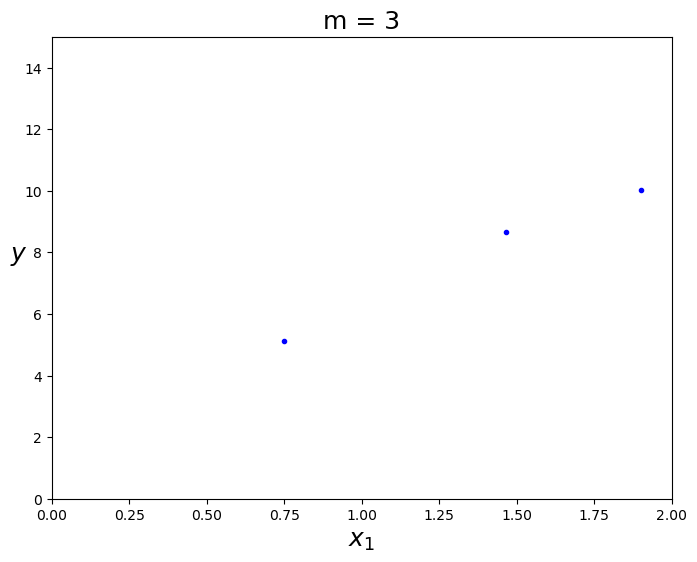

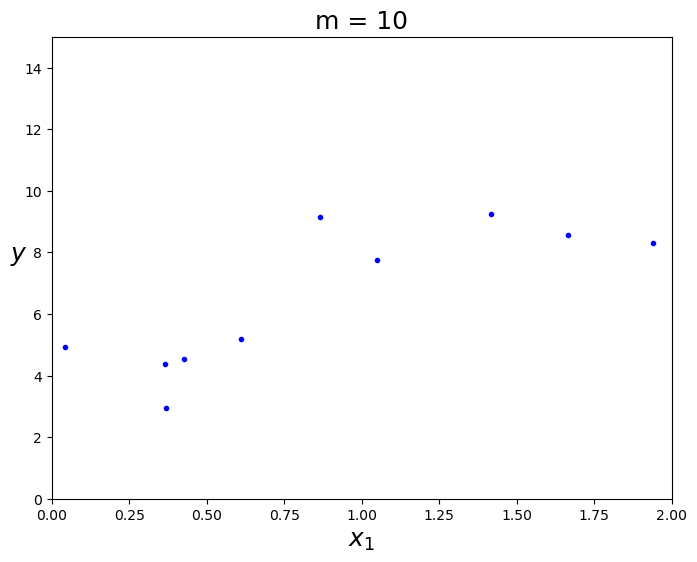

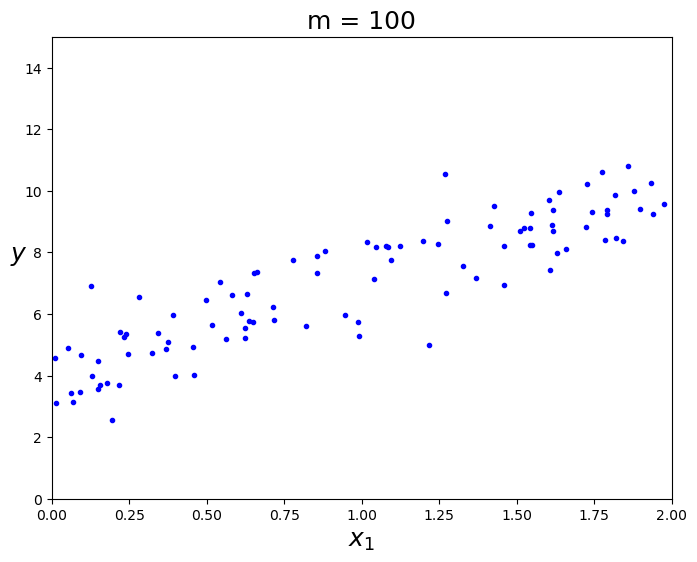

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # to make this code example reproducible
m_values = [3, 10, 100]  # number of instances

for m in m_values:
    X = 2 * np.random.rand(m, 1)  # column vector
    y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

    # Plot the data points
    plt.figure(figsize=(8, 6))
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.title(f"m = {m}", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.show()

#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

In [14]:
'''
20.2.6 contains the code to generate the data for the linear regression example in the book.
'''
import numpy as np

class BayesianLinearRegression:
    def __init__(self, alpha=1., beta=1.):
        self.alpha = alpha  # Precision parameter of the prior
        self.beta = beta    # Precision parameter of the likelihood
        self.w_mean = None  # Mean of the weight vector
        self.w_cov = None   # Covariance matrix of the weight vector

    def fit(self, X, y):
        # Add intercept term to input data
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Compute posterior parameters
        self.w_cov = np.linalg.inv(self.alpha * np.eye(X.shape[1]) + self.beta * X.T @ X) # taking the inverse of the dot product of alpha and the identity matrix and the dot product of beta, the transpose of X and X
        self.w_mean = self.beta * self.w_cov @ X.T @ y # takng the dot product of the beta, the covariance matrix and the dot product of X transpose and y

    def predict(self, X):
        # Add intercept term to input data
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Predict mean and variance of the predictive distribution
        y_mean = X @ self.w_mean
        y_var = 1 / self.beta + np.sum(X @ self.w_cov * X, axis=1)

        return y_mean, np.sqrt(y_var) # return the mean and the square root of the variance of the predictive distribution

# Generate random data for m=3
np.random.seed(0)
X_3 = np.random.rand(100, 3) * 10
true_w_3 = np.array([1, 2, 3])
y_3 = X_3 @ true_w_3 + np.random.randn(100)

# Generate random data for m=10
np.random.seed(1)
X_10 = np.random.rand(100, 10) * 10
true_w_10 = np.random.randn(10)
y_10 = X_10 @ true_w_10 + np.random.randn(100)

# Initiate and fit Bayesian linear regression model for m=3
model_3 = BayesianLinearRegression(alpha=1., beta=1.)
model_3.fit(X_3, y_3)

# Initiate and fit Bayesian linear regression model for m=10
model_10 = BayesianLinearRegression(alpha=1., beta=1.)
model_10.fit(X_10, y_10)

# Predict using the trained models
X_test = np.array([[5, 5, 5]])  # New data point to predict for m=3
y_pred_3, y_std_3 = model_3.predict(X_test)
print("Predicted mean for m=3:", y_pred_3)
print("Predicted standard deviation for m=3:", y_std_3)

X_test = np.random.rand(1, 10) * 10  # New data point to predict for m=10
y_pred_10, y_std_10 = model_10.predict(X_test)
print("\nPredicted mean for m=10:", y_pred_10)
print("Predicted standard deviation for m=10:", y_std_10)


Predicted mean for m=3: [29.86314219]
Predicted standard deviation for m=3: [1.00497489]

Predicted mean for m=10: [-2.49050526]
Predicted standard deviation for m=10: [1.04465492]
